<a href="https://colab.research.google.com/github/malinac/CoCa/blob/master/sd1i_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
dt = pd.read_csv('DailyDelhiClimateTest.csv')


In [ ]:
df.drop(['humidity', 'wind_speed', 'meanpressure'], axis=1, inplace=True)
dt.drop(['humidity', 'wind_speed', 'meanpressure'], axis=1, inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df.date)
dt['date'] = pd.to_datetime(dt.date)

In [ ]:
df.set_index('date', inplace=True)
dt.set_index('date', inplace=True)

In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Temperature')

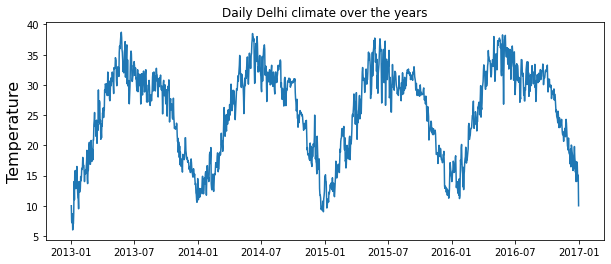

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df)
plt.title('Daily Delhi climate over the years')
plt.ylabel('Temperature', fontsize=16)



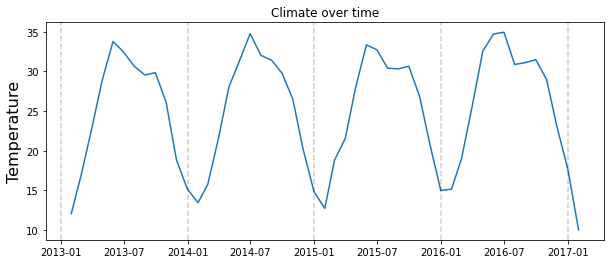

In [ ]:
df = df.resample('M').mean()
dt = dt.resample('M').mean()


plt.figure(figsize=(10, 4))
plt.plot(df)
plt.title('Climate over time')
plt.ylabel('Temperature', fontsize=16)
for year in range(2013, 2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

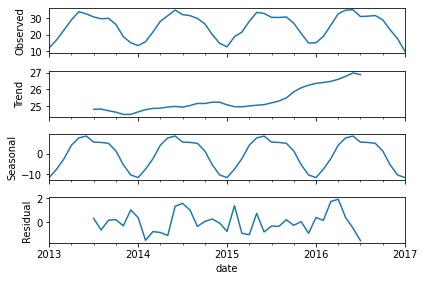

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()


In [ ]:
first_diff = df.diff()[1:]

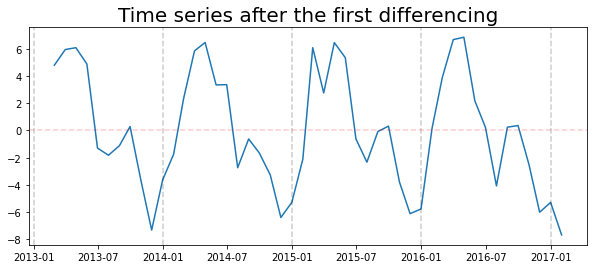

In [ ]:

plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Time series after the first differencing', fontsize=20)
for year in range(2013, 2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

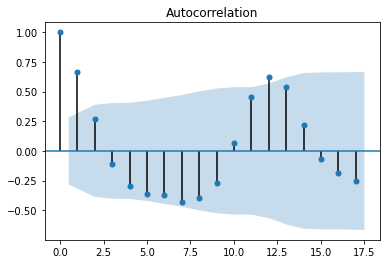

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(first_diff)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


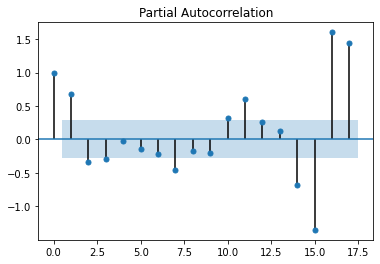

In [ ]:
pacf_plot = plot_pacf(first_diff)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
train = df[:-20]
test = df[-20:]
model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -107.863
Date:                            Sat, 15 May 2021   AIC                            225.727
Time:                                    17:06:54   BIC                            235.083
Sample:                                01-31-2013   HQIC                           229.262
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2071      1.305      0.159      0.874      -2.350       2.764
ma.L1         -0.1114      1.290     -0.086      0.931      -2.641       2.418
ar.S.L12       0.9995      0.046     21.822      0.000       0.910       1.089
ma.S.L12      -0.9242      3.104     -0.298      0.766      -7.007       5.159
sigma2         2.5522      7.494      0.341      0.733     -12.136      17.240
===================================================================================
Ljung-Box (Q):                       35.86   Jarque-Bera (JB):                11.51
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.66
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = results.forecast(20)

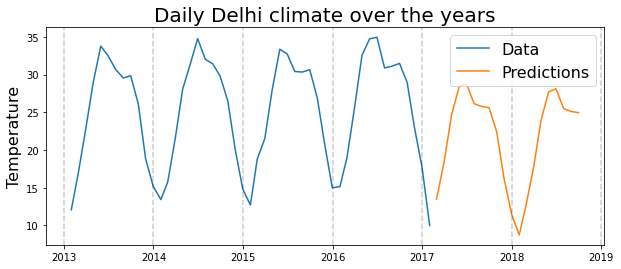

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Daily Delhi climate over the years', fontsize=20)
plt.ylabel('Temperature', fontsize=16)
for year in range(2013,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)